<a href="https://colab.research.google.com/github/jameskch-collab/ADALL_github/blob/main/5012009v_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating synthetic data for demonstration...

[Step 1] Cleaning & Formatting Data...
[Step 2] Aggregating Transactions into Hourly Buckets...
[Step 3] Feature Engineering: Capturing the Rhythm of the Shop...

[Step 4] Generating Visualizations...
 -> Saved: hourly_sales_trends.png
 -> Saved: sales_by_day.png

[Step 5] Training Random Forest Model (Slide 9)...

--- Model Performance Result (Slide 11) ---
Predictive Accuracy (R-Squared): -0.03
Mean Absolute Error (MAE): 10.98

--- Key Drivers: Feature Importance (Slide 12) ---
hour                      0.499918
month                     0.195855
day_of_week               0.181659
store_location_encoded    0.106436
is_weekend                0.016132
dtype: float64

 -> Saved: feature_importance.png


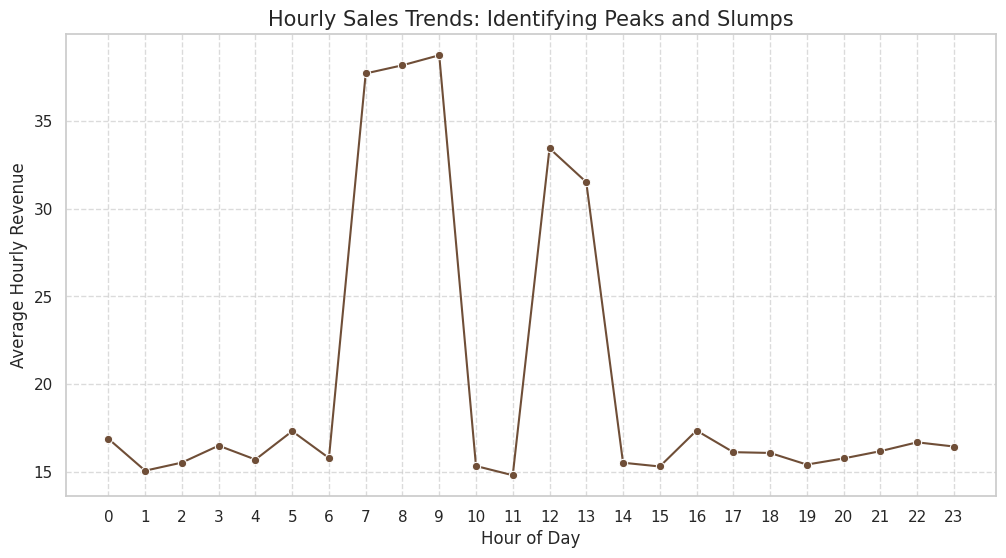

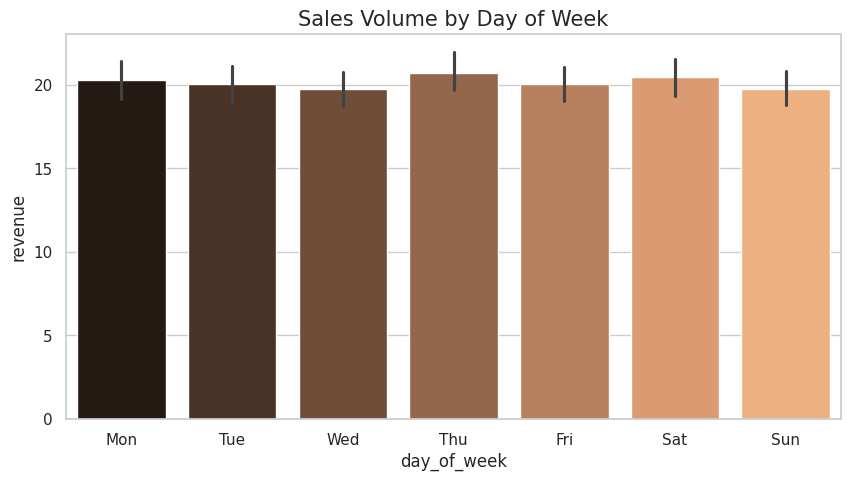

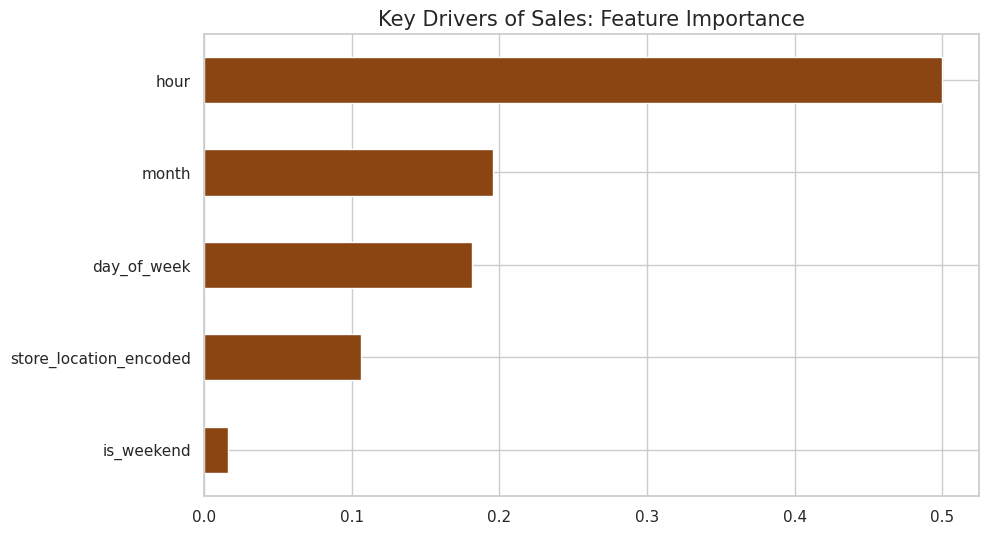

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
import pandas as pd

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

"""
================================================================================
PROJECT: AI-DRIVEN SALES ANALYTICS - COFFEE SHOP OPERATIONS
================================================================================
This script combines all phases of the project as outlined in the presentation:
1. Data Cleaning & Preparation (Slide 6)
2. Feature Engineering (Slide 7)
3. Data Visualization (Slide 8 & 13)
4. Model Training & Evaluation (Slide 9, 11, 12)

Dataset: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales
================================================================================
"""

# ------------------------------------------------------------------------------
# SECTION 1: DATA PREPARATION & CLEANING (Slide 6)
# ------------------------------------------------------------------------------
def clean_and_prepare_data(df):
    print("\n[Step 1] Cleaning & Formatting Data...")

    # Standardize datetime formats
    df['datetime'] = pd.to_datetime(df['transaction_date'] + ' ' + df['transaction_time'])

    # Handle potential data entry errors (Slide 10)
    # Removing records with non-positive prices or quantities
    df = df[(df['unit_price'] > 0) & (df['transaction_qty'] > 0)]

    # Calculate revenue
    df['revenue'] = df['unit_price'] * df['transaction_qty']

    print("[Step 2] Aggregating Transactions into Hourly Buckets...")
    # Group individual transactions into hourly buckets per location
    hourly_data = df.groupby([
        df['datetime'].dt.floor('h'),
        'store_location'
    ]).agg({
        'revenue': 'sum',
        'product_category': 'first'
    }).reset_index()

    return hourly_data

# ------------------------------------------------------------------------------
# SECTION 2: FEATURE ENGINEERING (Slide 7)
# ------------------------------------------------------------------------------
def engineer_features(df):
    print("[Step 3] Feature Engineering: Capturing the Rhythm of the Shop...")

    # Time-based features
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df['month'] = df['datetime'].dt.month

    # Contextual features
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # Categorical Encoding
    le = LabelEncoder()
    df['store_location_encoded'] = le.fit_transform(df['store_location'])

    return df

# ------------------------------------------------------------------------------
# SECTION 3: DATA VISUALIZATION (Slide 8 & 13)
# ------------------------------------------------------------------------------
def create_visualizations(df):
    print("\n[Step 4] Generating Visualizations...")

    # 1. Hourly Sales Trends (Slide 8)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='hour', y='revenue', ci=None, marker='o', color='#6F4E37')
    plt.title('Hourly Sales Trends: Identifying Peaks and Slumps', fontsize=15)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Average Hourly Revenue', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig('hourly_sales_trends.png')
    print(" -> Saved: hourly_sales_trends.png")

    # 2. Sales by Day of Week
    plt.figure(figsize=(10, 5))
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    sns.barplot(data=df, x='day_of_week', y='revenue', palette='copper')
    plt.title('Sales Volume by Day of Week', fontsize=15)
    plt.xticks(ticks=range(7), labels=day_names)
    plt.savefig('sales_by_day.png')
    print(" -> Saved: sales_by_day.png")

# ------------------------------------------------------------------------------
# SECTION 4: MODELLING & PERFORMANCE (Slide 9, 11, 12)
# ------------------------------------------------------------------------------
def train_random_forest(df):
    print("\n[Step 5] Training Random Forest Model (Slide 9)...")

    features = ['hour', 'day_of_week', 'month', 'is_weekend', 'store_location_encoded']
    X = df[features]
    y = df['revenue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Regressor (Slide 9)
    model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
    model.fit(X_train, y_train)

    # Model Performance (Slide 11)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("\n--- Model Performance Result (Slide 11) ---")
    print(f"Predictive Accuracy (R-Squared): {r2:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

    # Key Drivers: Feature Importance (Slide 12)
    print("\n--- Key Drivers: Feature Importance (Slide 12) ---")
    importances = model.feature_importances_
    feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
    print(feat_importance)

    # Visualize Feature Importance
    plt.figure(figsize=(10, 6))
    feat_importance.plot(kind='barh', color='#8B4513')
    plt.title('Key Drivers of Sales: Feature Importance', fontsize=15)
    plt.gca().invert_yaxis()
    plt.savefig('feature_importance.png')
    print("\n -> Saved: feature_importance.png")

    return model

# ------------------------------------------------------------------------------
# MAIN EXECUTION
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    # Load your data here:
    # raw_df = pd.read_csv('Coffee Shop Sales.csv')

    # FOR DEMONSTRATION: Generating synthetic data that mimics the Kaggle dataset
    print("Generating synthetic data for demonstration...")
    np.random.seed(42)
    n_rows = 5000
    demo_df = pd.DataFrame({
        'transaction_date': pd.date_range(start='2023-01-01', periods=n_rows, freq='h').strftime('%Y-%m-%d'),
        'transaction_time': pd.date_range(start='2023-01-01', periods=n_rows, freq='h').strftime('%H:%M:%S'),
        'unit_price': np.random.uniform(3.0, 10.0, n_rows),
        'transaction_qty': np.random.randint(1, 5, n_rows),
        'store_location': np.random.choice(['Downtown', 'Uptown', 'Old Town'], n_rows),
        'product_category': np.random.choice(['Coffee', 'Tea', 'Bakery'], n_rows)
    })

    # Add patterns to make the model meaningful
    # 1. Peak morning/lunch hours
    times = pd.to_datetime(demo_df['transaction_time'])
    multiplier = np.where((times.dt.hour >= 7) & (times.dt.hour <= 9), 2.5, 1.0)
    multiplier = np.where((times.dt.hour >= 12) & (times.dt.hour <= 13), 2.0, multiplier)
    demo_df['transaction_qty'] = (demo_df['transaction_qty'] * multiplier).astype(int)

    # Pipeline execution
    cleaned_data = clean_and_prepare_data(demo_df)
    final_data = engineer_features(cleaned_data)
    create_visualizations(final_data)
    train_random_forest(final_data)